In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

   Extracurricular  Sports  Music  Volunteering       GPA
0                0       0      1             0  2.929196
1                0       0      0             0  3.042915
2                0       0      0             0  0.112602
3                1       0      0             0  2.054218
4                0       0      0             0  1.288061
                 Extracurricular    Sports     Music  Volunteering       GPA
Extracurricular         1.000000 -0.011820 -0.014191     -0.007427  0.094078
Sports                 -0.011820  1.000000 -0.020474     -0.002799  0.057859
Music                  -0.014191 -0.020474  1.000000      0.017224  0.073318
Volunteering           -0.007427 -0.002799  0.017224      1.000000  0.003258
GPA                     0.094078  0.057859  0.073318      0.003258  1.000000

GPA by Extracurricular:
Extracurricular
0    1.838316
1    2.015357
Name: GPA, dtype: float64

GPA by Sports:
Sports
0    1.871240
1    1.986381
Name: GPA, dtype: float64

GPA by Music:
Mus

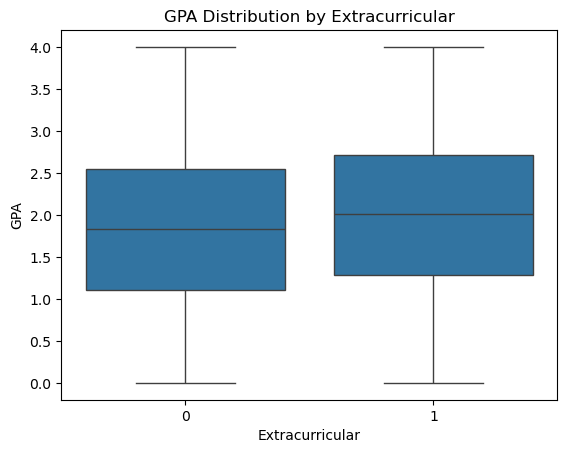

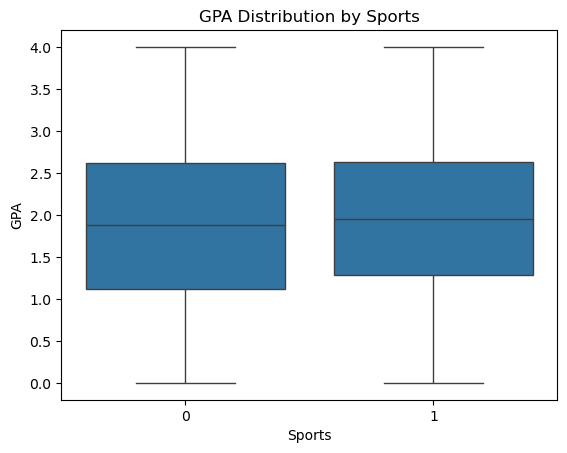

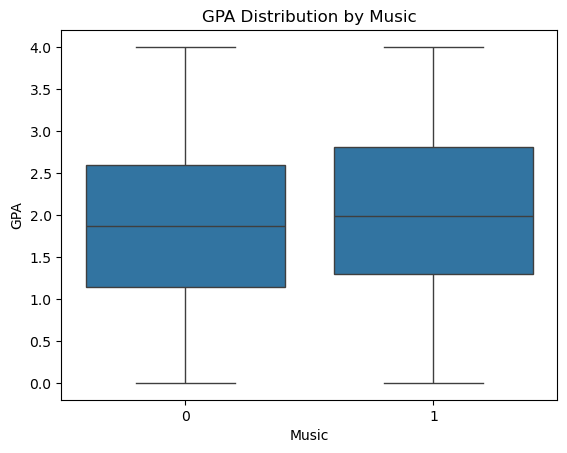

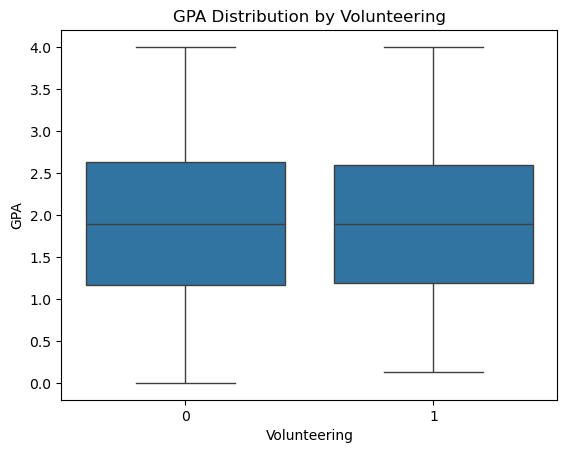

In [6]:
df = pd.read_csv('../artifacts/Student_performance_data.csv')

print(df[["Extracurricular", "Sports", "Music", "Volunteering", "GPA"]].head())

print(df[["Extracurricular", "Sports", "Music", "Volunteering", "GPA"]].corr())

activities = ["Extracurricular", "Sports", "Music", "Volunteering"]

for activity in activities:
    print(f"\nGPA by {activity}:")
    print(df.groupby(activity)["GPA"].mean())

for activity in activities:
    sns.boxplot(x=df[activity], y=df["GPA"])
    plt.title(f"GPA Distribution by {activity}")
    plt.xlabel(activity)
    plt.ylabel("GPA")
    plt.show()

In [7]:
import statsmodels.api as sm

X = df[["Extracurricular", "Sports", "Music", "Volunteering"]]
y = df["GPA"]

# Add a constant (for intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     11.00
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           7.73e-09
Time:                        09:47:22   Log-Likelihood:                -3159.7
No. Observations:                2392   AIC:                             6329.
Df Residuals:                    2387   BIC:                             6358.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.7649      0.029     